# 1. Install Dependencies and Setup

In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
#!pip list

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr

C:\Users\shaya\AppData\Local\Temp\ipykernel_15144\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train'

In [ ]:
# image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
# for image_class in os.listdir(data_dir):
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts:
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e:
#             print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2036 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

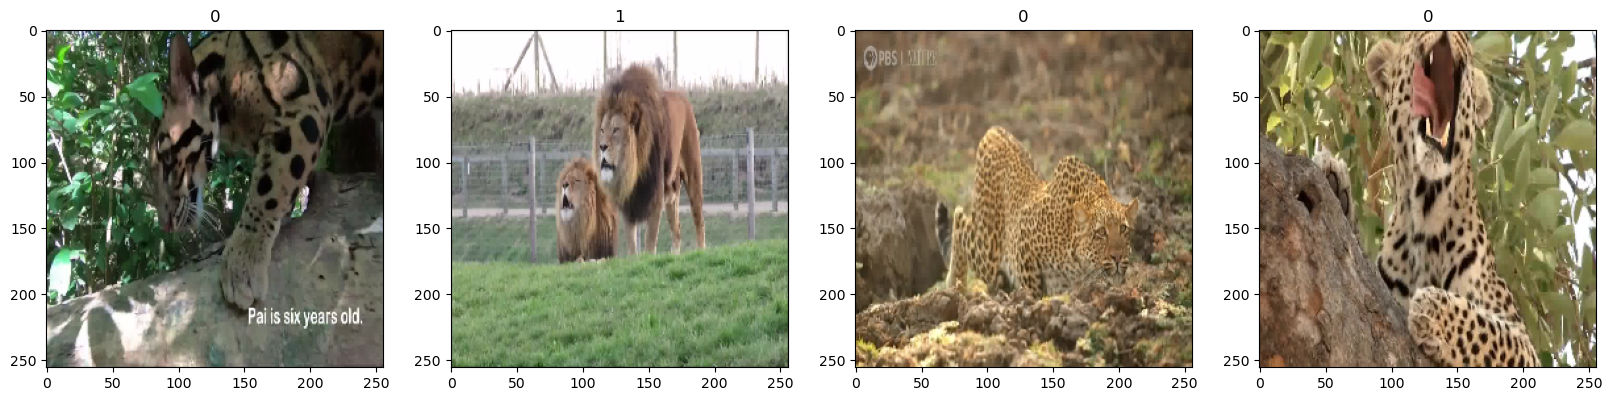

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
len(data)

64

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.60130256, 0.41698885, 0.24443981],
          [0.6240182 , 0.43970445, 0.26715544],
          [0.66300553, 0.4786918 , 0.30614278],
          ...,
          [0.6040135 , 0.5020527 , 0.3647978 ],
          [0.5867034 , 0.48474264, 0.34748775],
          [0.5645987 , 0.46263787, 0.32538298]],
 
         [[0.6651654 , 0.4808517 , 0.3083027 ],
          [0.68794423, 0.5036305 , 0.3310815 ],
          [0.7292198 , 0.5449061 , 0.37235707],
          ...,
          [0.57217324, 0.47021246, 0.33295754],
          [0.55448407, 0.45252326, 0.31526837],
          [0.5325688 , 0.43060806, 0.29335314]],
 
         [[0.7228118 , 0.5384981 , 0.3659491 ],
          [0.74527466, 0.56096095, 0.38841194],
          [0.7855545 , 0.6012408 , 0.42869177],
          ...,
          [0.54359347, 0.4416327 , 0.30437776],
          [0.52542895, 0.42346814, 0.28621325],
          [0.50332415, 0.40136334, 0.26410845]],
 
         ...,
 
         [[0.4669424 , 0.39635417, 0.3179228 ],
          [0.42542

# 5. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size, val_size, test_size, len(data)

(44, 12, 6, 64)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
44/44 [==============================] - 27s 588ms/step - loss: 0.5203 - accuracy: 0.7322 - val_loss: 0.3261 - val_accuracy: 0.8229
Epoch 2/10
44/44 [==============================] - 30s 677ms/step - loss: 0.3093 - accuracy: 0.8800 - val_loss: 0.2710 - val_accuracy: 0.8854
Epoch 3/10
44/44 [==============================] - 33s 749ms/step - loss: 0.1699 - accuracy: 0.9418 - val_loss: 0.1506 - val_accuracy: 0.9349
Epoch 4/10
44/44 [==============================] - 37s 816ms/step - loss: 0.1028 - accuracy: 0.9631 - val_loss: 0.1980 - val_accuracy: 0.9271
Epoch 5/10
44/44 [==============================] - 38s 856ms/step - loss: 0.0691 - accuracy: 0.9773 - val_loss: 0.1525 - val_accuracy: 0.9401
Epoch 6/10
44/44 [==============================] - 34s 765ms/step - loss: 0.1252 - accuracy: 0.9524 - val_loss: 0.1517 - val_accuracy: 0.9375
Epoch 7/10
44/44 [==============================] - 32s 715ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.1122 - val_accuracy: 0.9505

# 8. Plot Performance

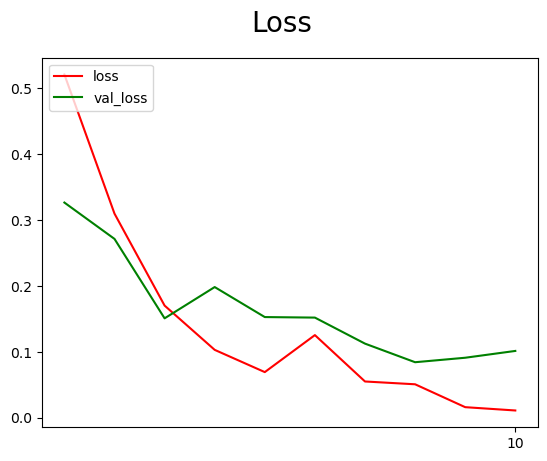

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xticks([len(hist.history['loss']) - 1], [len(hist.history['loss'])])
plt.legend(loc="upper left")
plt.show()

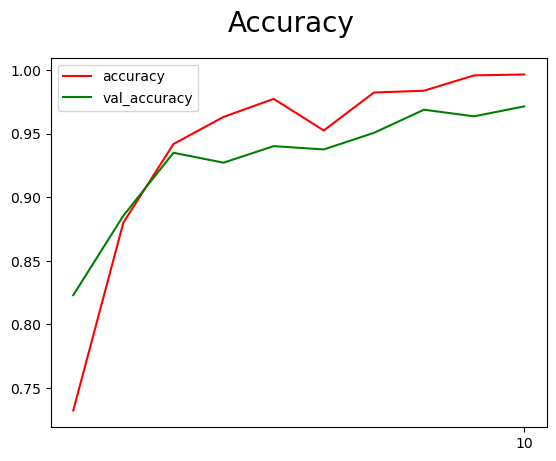

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xticks([len(hist.history['accuracy']) - 1], [len(hist.history['accuracy'])])
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 285ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9886364, shape=(), dtype=float32) tf.Tensor(0.96666664, shape=(), dtype=float32) tf.Tensor(0.9791667, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

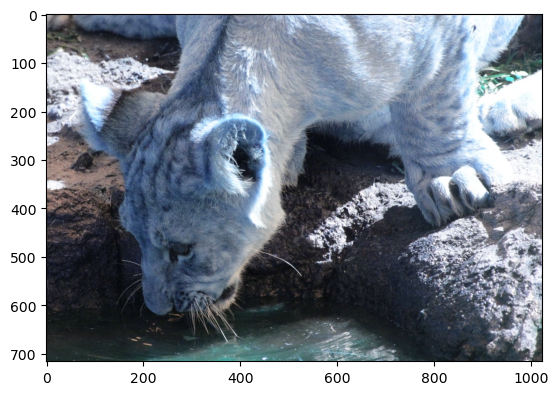

In [ ]:
img = cv2.imread(r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train\lion\f8958a678cb30004.jpg')
# img = cv2.imread(r'C:\Users\shaya\Downloads\3jgky8cxhcndurawfpb8i7\images.cv_3jgky8cxhcndurawfpb8i7\data\train\leopard\d2906b26acd16403.jpg')
plt.imshow(img)
plt.show()

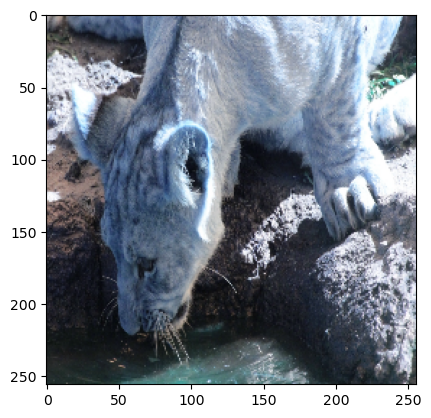

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [ ]:
yhat

array([[0.99999547]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is lion')
else:
    print(f'Predicted class is leopard')

Predicted class is lion
